In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

file_path = '/content/drive/MyDrive/dataset/named_asure.csv'
df = pd.read_csv(file_path)
# df = df.sort_values(by=['machine_id', 'time_stamp'])
print(df)



                       h1        h2         h3    cpu_per         h5  mem_per
0     2023-12-22 20:30:00    master       301m  15.000000     2557Mi  32.0000
1     2023-12-22 20:30:00   worker1       978m  97.000000      473Mi  63.0000
2     2023-12-22 20:30:00  worker10        65m   6.000000      584Mi  73.0000
3     2023-12-22 20:30:00  worker11        85m   8.000000      579Mi  72.0000
4     2023-12-22 20:30:00  worker12        64m   6.000000      517Mi  69.0000
...                   ...       ...        ...        ...        ...      ...
9025  2023-12-22 22:20:00   worker8       129m  12.000000      577Mi  72.0000
9026  2023-12-22 22:20:00   worker9       140m  14.000000      581Mi  73.0000
9027  2023-12-22 22:20:00  worker10  <unknown>  10.087508  <unknown>  66.4384
9028  2023-12-22 22:20:00   worker4  <unknown>  10.087508  <unknown>  66.4384
9029  2023-12-22 22:20:00   worker1  <unknown>  10.087508  <unknown>  66.4384

[9030 rows x 6 columns]


In [5]:
df['cpu_per'] = df['cpu_per'].astype(float)

# Display the updated DataFrame

df['cpu_per']

df1=df.reset_index()['cpu_per']
# df1


In [6]:
df1

0       15.000000
1       97.000000
2        6.000000
3        8.000000
4        6.000000
          ...    
9025    12.000000
9026    14.000000
9027    10.087508
9028    10.087508
9029    10.087508
Name: cpu_per, Length: 9030, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, GRU


In [16]:
import tensorflow as tf

(6120, 200)
(6120,)
(2508, 200)
(2508,)
Epoch 1/110
96/96 [==============================] - 6s 25ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 2/110
96/96 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 3/110
96/96 [==============================] - 2s 22ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/110
96/96 [==============================] - 2s 21ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/110
96/96 [==============================] - 2s 16ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/110
96/96 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/110
96/96 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/110
96/96 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/110
96/96 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/110
96/96 [==============================] - 2s 18m

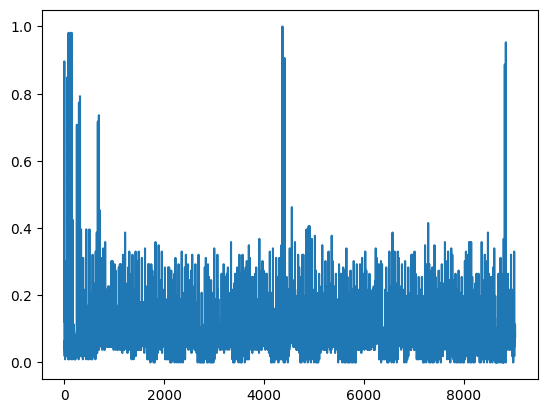

In [24]:


import matplotlib.pyplot as plt
plt.plot(df1)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

window_size = 200 # WINDOW SIZE...
X_train, y_train = create_dataset(train_data, window_size)
X_test, ytest = create_dataset(test_data, window_size)

print(X_train.shape), print(y_train.shape)

print(X_test.shape), print(ytest.shape)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# model = Sequential()
# model.add(GRU(50, return_sequences=True, input_shape=(window_size, 1)))
# model.add(GRU(50))
# model.add(Dense(1))
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(window_size, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=110,batch_size=64,verbose=1)

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_test=mean_absolute_error(ytest,test_predict)
rmse_test=math.sqrt(mean_squared_error(ytest,test_predict))

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)





In [ ]:
mae_test


0.019283475212774952

In [ ]:
rmse_test

0.09228428815445278

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse Transformations
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate MAE and RMSE
mae_train = mean_absolute_error(y_train, train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))

mae_test = mean_absolute_error(ytest, test_predict)
rmse_test = np.sqrt(mean_squared_error(ytest, test_predict))

print(f'MAE on training set: {mae_train}')
print(f'RMSE on training set: {rmse_train}')
print(f'MAE on test set: {mae_test}')
print(f'RMSE on test set: {rmse_test}')


75/75 [==============================] - 1s 8ms/step
MAE on training set: 0.003933433170671264
RMSE on training set: 0.035120219706749174
MAE on test set: 0.019283475212774952
RMSE on test set: 0.09228428815445278


In [25]:
# Define the path where you want to save the model
model_path = '/content/drive/MyDrive/dataset/AZURE_Trained_model.h5'

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)


Model saved successfully at: /content/drive/MyDrive/dataset/AZURE_Trained_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
######################## ASURE PREDICTION #############################################

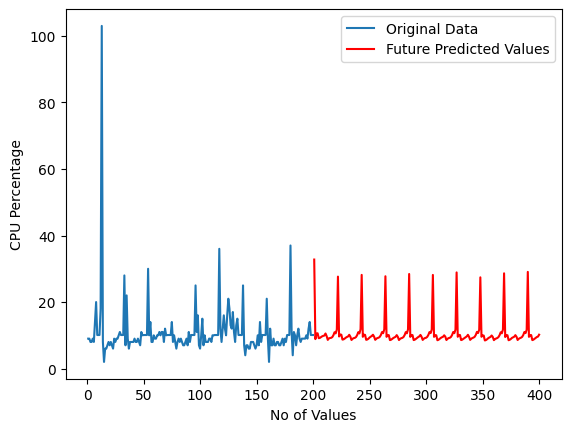

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/dataset/AZURE_Trained_model.h5'
model = load_model(model_path)

# Load the data
file_path = '/content/drive/MyDrive/dataset/named_asure.csv'
dfnew = pd.read_csv(file_path)

# Preprocess the data
dfnew1 = dfnew.reset_index()['cpu_per']
scaler = MinMaxScaler(feature_range=(0,1))
dfnew1 = scaler.fit_transform(np.array(dfnew1).reshape(-1,1))

# Define window size and prepare input data
window_size = 200
length_data = len(dfnew1)
x_input = dfnew1[length_data-window_size:].reshape(1,-1)
temp_input = list(x_input[0])
lst_output = []

# Generate predictions for the next 200 days
n_steps = window_size
i = 0
while(i < 200):
    if(len(temp_input) > window_size):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Prepare for plotting
day_new = np.arange(1, window_size + 1)
day_pred = np.arange(window_size + 1, window_size + 1 + 200)
dfnew1len = len(dfnew1)

# Inverse transform the scaled data
predicted_data = scaler.inverse_transform(lst_output)

# Plotting
plt.plot(day_new, scaler.inverse_transform(dfnew1[dfnew1len-window_size:]), label='Original Data')
plt.plot(day_pred, predicted_data, color='red', linestyle='-', label='Future Predicted Values')
plt.xlabel('No of Values')
plt.ylabel('CPU Percentage')
plt.legend()
plt.show()
